In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


In [ ]:
df=pd.read_csv("D:/Heart_Disease_Project/data/heart_disease_preprocessed.csv")
X = df.drop(columns=['num'])
y = df['num']

In [27]:
pca=PCA()
x_pca=pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [28]:
optimal_components = (cumulative_variance < 0.95).sum() + 1
print(f"Optimal Components: {optimal_components}")
print(f"Variance Retained: {cumulative_variance[optimal_components-1]:.2%}")

Optimal Components: 14
Variance Retained: 95.03%


In [29]:
X_pca_optimal = x_pca[:, :optimal_components]
pca_df = pd.DataFrame(X_pca_optimal, columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["target"]=y.values

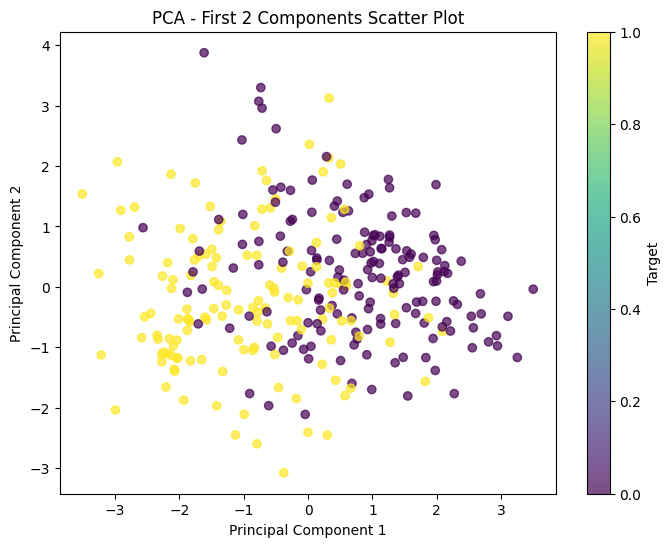

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df["PC1"], pca_df["PC2"], 
    c=pca_df["target"], cmap="viridis", alpha=0.7
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First 2 Components Scatter Plot")
plt.colorbar(label="Target")
plt.show()

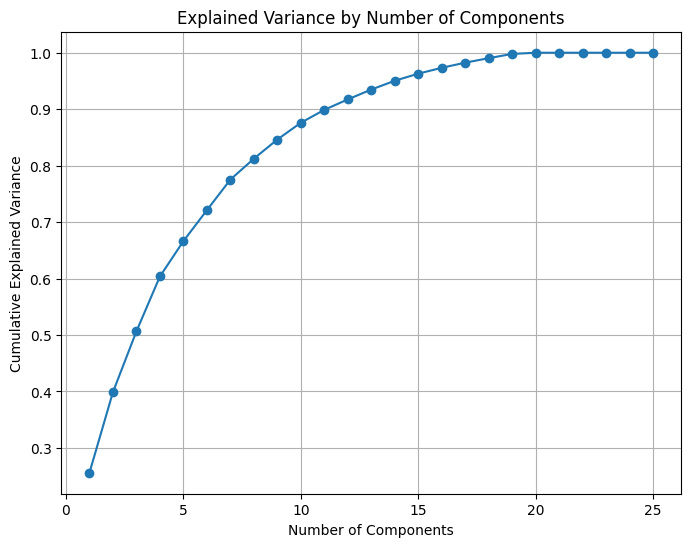

In [31]:
plt.figure(figsize=(8,6))
plt.plot(
    range(1, len(explained_variance)+1), 
    np.cumsum(explained_variance), marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Number of Components")
plt.grid(True)
plt.show()

In [ ]:
pca_df.to_csv(f"D:/Heart_Disease_Project/data/heart_disease_pca.csv",index=False)